In [62]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import quandl
import  pylab as pl
import numpy as np
from sklearn.preprocessing import Normalizer
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from math import sqrt
from sklearn import preprocessing
from ipysheet import from_dataframe, to_dataframe

In [45]:
data = pd.read_csv("../one_year_data.csv", index_col = "Date")
data.index = pd.to_datetime(data.index)

In [48]:
start = "2017-01-01"
data = data.loc[start:]#Calculating annual mean returns and variances
returns = data.pct_change().mean() * 252
variance = data.pct_change().std() * sqrt(252)
returns.columns = ["Returns"]
variance.columns = ["Variance"]#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]

Symbols
AMZN     753.669983
AAPL     116.150002
WBA       82.959999
NOC      234.889999
BA       156.970001
LMT      253.309998
MCD      119.620003
INTC      36.599998
NAV       31.840000
IBM      167.190002
TXN       73.580002
MA       105.389999
MSFT      62.580002
GE        30.471153
SYMC      24.010000
AXP       75.349998
PEP      104.650002
KO        41.799999
JNJ      115.839996
TM       118.550003
HMC       29.610001
MSBHY     42.669998
SNE       28.290001
XOM       90.889999
CVX      117.849998
VLO       70.419998
F         12.590000
BAC       22.530001
Name: 2017-01-03 00:00:00, dtype: float64


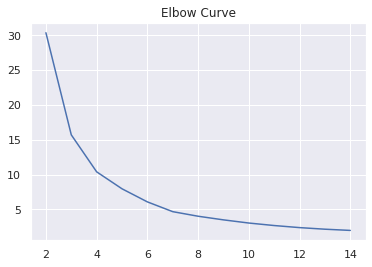

In [53]:
X =  ret_var.values #Converting ret_var into nummpy array
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters

pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.show()

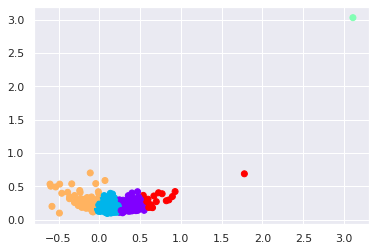

In [55]:
X = ret_var.values
kmeans =KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
pl.show()

In [66]:
Company = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df = pd.concat([Company, cluster_labels],axis = 1)
sheet = from_dataframe(df)
print(sheet)

Sheet(cells=(Cell(choice=[], column_end=0, column_start=0, numeric_format=None, row_end=488, row_start=0, squeeze_row=False, type='text', value=[['MMM', 0], ['ABT', 0], ['ABBV', 0], ['ABMD', 0], ['ACN', 0], ['ATVI', 4], ['ADBE', 0], ['AMD', 3], ['AAP', 3], ['AES', 3], ['AMG', 0], ['AFL', 1], ['A', 0], ['APD', 1], ['AKAM', 1], ['ALK', 3], ['ALB', 0], ['ARE', 1], ['ALXN', 1], ['ALGN', 4], ['ALLE', 1], ['AGN', 3], ['ADS', 1], ['LNT', 1], ['ALL', 0], ['GOOGL', 0], ['GOOG', 0], ['MO', 1], ['AMZN', 0], ['AEE', 1], ['AAL', 1], ['AEP', 1], ['AXP', 0], ['AIG', 3], ['AMT', 0], ['AWK', 0], ['AMP', 0], ['ABC', 1], ['AME', 0], ['AMGN', 1], ['APH', 0], ['ADI', 1], ['ANSS', 0], ['ANTM', 0], ['AON', 1], ['AOS', 0], ['APA', 3], ['AIV', 1], ['AAPL', 0], ['AMAT', 0], ['APTV', 3], ['ADM', 3], ['ARNC', 0], ['AJG', 1], ['AIZ', 1], ['ATO', 1], ['T', 3], ['ADSK', 0], ['ADP', 1], ['AZO', 3], ['AVB', 1], ['AVY', 0], ['BHGE', 3], ['BLL', 3], ['BAC', 0], ['BK', 1], ['BAX', 0], ['BBT', 1], ['BDX', 0], ['BBY', 4], 